# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [145]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [146]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return (x**2)*numpy.sin(x)

Ensure your function works with numpy arrays:

In [147]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [148]:
def g(x):
    '''Analytical integral of f(x).'''
    return (2*x)*numpy.sin(x) - ((x**2)-2)*numpy.cos(x) - 2

Check your solution with the same numpy array:

In [149]:
assert g(0) == 0.

In [150]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [151]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax) - g(xmin)

Check your analytic function:

In [152]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [338]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    if N % 2 == 1:
        N += 1
        
    dx = (xmax-xmin)/N
    x = numpy.linspace(xmin, xmax, N+1)
    y = f(x)
    return (dx/3)*(numpy.sum(y[0:-1:2] + 4*y[1::2] + y[2::2]))

Make sure you have implemented Simpson's rule correctly:

In [339]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [340]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


<function matplotlib.pyplot.show>

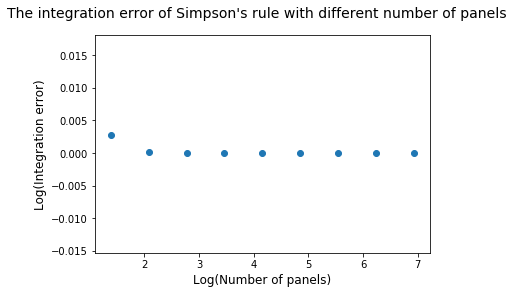

In [356]:
''' I was having an issue where my code for making N an even number 
wouldn't work for an array of N values. I had to result to typing 
each one out individually to be able to plot a graph. 
Also, 'plt.plot' returned a blank graph so a scatter graph is the best I can offer.'''

xmin = 0
xmax = 2
N_1 = 4
N_2 = 8
N_3 = 16
N_4 = 32
N_5 = 64
N_6 = 128
N_7 = 256
N_8 = 512
N_9 = 1024
result_analytic = integrate_analytic(xmin, xmax)
result_numeric_1 = integrate_numeric(xmin, xmax, N_1)
D_1 = result_analytic/result_numeric_1
result_numeric_2 = integrate_numeric(xmin, xmax, N_2)
D_2 = result_analytic/result_numeric_2
result_numeric_3 = integrate_numeric(xmin, xmax, N_3)
D_3 = result_analytic/result_numeric_3
result_numeric_4 = integrate_numeric(xmin, xmax, N_4)
D_4 = result_analytic/result_numeric_4
result_numeric_5 = integrate_numeric(xmin, xmax, N_5)
D_5 = result_analytic/result_numeric_5
result_numeric_6 = integrate_numeric(xmin, xmax, N_6)
D_6 = result_analytic/result_numeric_6
result_numeric_7 = integrate_numeric(xmin, xmax, N_7)
D_7 = result_analytic/result_numeric_7
result_numeric_8 = integrate_numeric(xmin, xmax, N_8)
D_8 = result_analytic/result_numeric_8
result_numeric_9 = integrate_numeric(xmin, xmax, N_9)
D_9 = result_analytic/result_numeric_9
xvalues = [(numpy.log(N_1), numpy.log(N_2), numpy.log(N_3), numpy.log(N_4), numpy.log(N_5), numpy.log(N_6), numpy.log(N_7), numpy.log(N_8), numpy.log(N_9))]
yvalues = [(numpy.log(D_1), numpy.log(D_2), numpy.log(D_3), numpy.log(D_4), numpy.log(D_5), numpy.log(D_6), numpy.log(D_7), numpy.log(D_8), numpy.log(D_9))]
plt.xlabel("Log(Number of panels)", size=12)
plt.ylabel("Log(Integration error)", size=12)
plt.suptitle("The integration error of Simpson's rule with different number of panels", size=14, y=0.98)
plt.scatter(xvalues, yvalues)
plt.show

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The Simpson approximation has an integration error of N^-4, where N is the number of panels used. Therefore, increasing the number of panels increases the accuracy of the numerical approximation until between N=10^3 and N=10^4. After this point, numerical round off issues cause the accuracy of the numerical method to deviate seemingly randomly.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Similarly to with the Simpson rule, increasing the number of panels also increases the accuracy of the trapezium rule approximation, as the trapezium rule has an integration error of N^-2. As the trapezium rule is a first order approximation it maintains a smooth decrease in integration error as the panel number is increased and deviates only slightly when numerical round off issues are introduced.